In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
from collections import defaultdict
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

subset100 = pd.read_csv("../raw_data/track_meta_100subset_new.csv")

In [2]:
subset100.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Playlistid', 'Trackid', 'Artist_Name',
       'Track_Name', 'Album_Name', 'Track_Duration', 'Artist_uri', 'Track_uri',
       'Album_uri', 'acousticness', 'artist_genres', 'artist_popularity',
       'danceability', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'Playlist', 'Album', 'Track', 'Artist'],
      dtype='object')

In [3]:
subset100_new = subset100[['Playlistid', 'Trackid', 'Artist_Name', 'Track_uri',
                           'Track_Name', 'Album_Name', 'Track_Duration',
                           'acousticness', 'artist_genres', 'artist_popularity',
                           'danceability', 'energy', 'explicit', 'instrumentalness', 'key',
                           'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
                           'time_signature', 'valence']] #keep columns of interest

In [4]:
subset100_new.describe()

,Playlistid,Trackid,Track_Duration,acousticness,artist_popularity,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000
mean,141430.921728,24.724261,231110.976616,0.179124,74.487821,0.642737,0.667381,0.016271,5.137707,0.187531,-6.535065,0.644690,0.112890,122.456843,3.967847,0.520836
std,85921.299098,24.255188,52566.233704,0.221431,12.999891,0.144650,0.178598,0.093602,3.664256,0.150499,2.766270,0.478685,0.112955,28.402454,0.280291,0.227985
min,430.000000,0.000000,36400.000000,0.000006,0.000000,0.093000,0.006880,0.000000,0.000000,0.021000,-37.315000,0.000000,0.022500,60.048000,1.000000,0.028600
25%,61388.000000,7.000000,201250.000000,0.019750,67.000000,0.547000,0.545000,0.000000,1.000000,0.092600,-7.816000,0.000000,0.039400,100.000000,4.000000,0.348000
50%,155598.000000,17.000000,224386.000000,0.079600,75.000000,0.652000,0.690000,0.000000,5.000000,0.128000,-6.056000,1.000000,0.061600,120.462000,4.000000,0.514000
75%,221044.000000,34.000000,254040.000000,0.255000,84.000000,0.743000,0.808000,0.000053,8.000000,0.241000,-4.619500,1.000000,0.138000,140.023000,4.000000,0.707000
max,271274.000000,134.000000,669133.000000,0.977000,100.000000,0.978000,0.991000,0.944000,11.000000,0.966000,-0.698000,1.000000,0.808000,209.893000,5.000000,0.982000


## Train-Test Split

In [5]:
# Train-val-test split (20%)
train, test = train_test_split(subset100_new, test_size=0.2, random_state=42, stratify = subset100['Playlistid'])
train, val = train_test_split(train, test_size=0.2, random_state=42, stratify = train['Playlistid'])

In [6]:
train['index'] = np.arange(1, len(train)+1)

In [7]:
train.head()

,Playlistid,Trackid,Artist_Name,Track_uri,Track_Name,Album_Name,Track_Duration,acousticness,artist_genres,artist_popularity,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,index
832,61388,70,Nicki Minaj,spotify:track:39XNWKuuBZK0oaV5YmD2dF,Moment 4 Life,Pink Friday,279306,0.3750,"['dance pop', 'hip pop', 'pop', 'pop rap', 'rap']",90.0,...,0.0,11.0,0.299,-3.821,1.0,0.2950,97.946,4.0,0.371,1
670,51590,31,Young Money,spotify:track:6HfOzLLjsaXsehIFEsrxTk,Trophies,Rise Of An Empire,188320,0.1580,"['dance pop', 'dirty south rap', 'gangster rap...",62.0,...,0.0,1.0,0.137,-7.467,1.0,0.4410,143.936,4.0,0.268,2
1857,193450,16,Justin Timberlake,spotify:track:6JV2JOEocMgcZxYSZelKcc,CAN'T STOP THE FEELING! (Original Song from Dr...,CAN'T STOP THE FEELING! (Original Song from Dr...,236001,0.0123,"['dance pop', 'pop', 'r&b']",81.0,...,0.0,0.0,0.191,-5.715,1.0,0.0749,113.030,4.0,0.701,3
1985,198885,6,Shawn Mendes,spotify:track:2ZNowcE7ehJYEkChoRjSx0,Life Of The Party,Handwritten,214533,0.0663,"['canadian pop', 'dance pop', 'pop', 'post-tee...",87.0,...,0.0,10.0,0.111,-4.995,1.0,0.0314,113.979,4.0,0.161,4
934,73524,1,Justin Timberlake,spotify:track:6vt0I1cw1YmAIKDJvHVIM5,Suit & Tie,The 20/20 Experience (Deluxe Version),326280,0.1030,"['dance pop', 'pop', 'r&b']",81.0,...,0.0,11.0,0.164,-3.799,0.0,0.2190,101.985,4.0,0.357,5


## Scale Features for Clustering

In [8]:
scaleCols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
             'key', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature', 'artist_popularity'] #mode excluded from analysis
scaler = StandardScaler()
scaler.fit(train.loc[:, scaleCols])
train_scaled = train.copy() #copy original master data frame
train_scaled[scaleCols] = scaler.transform(train_scaled[scaleCols]) #scale transform cluster columns
train_scaled['index'] = np.arange(1, len(train_scaled)+1) #reappend index column
train_scaled = train_scaled.rename(columns = {'acousticness': 'acousticness_scaled',
                                              'danceability': 'danceability_scaled',
                                              'energy': 'energy_scaled',
                                              'instrumentalness': 'instrumentalness_scaled',
                                              'key': 'key_scaled',
                                              'liveness': 'liveness_scaled',
                                              'loudness': 'loudness_scaled',
                                              'speechiness': 'speechiness_scaled',
                                              'tempo': 'tempo_scaled',
                                              'valence': 'valence_scaled',
                                              'time_signature': 'time_signature_scaled',
                                              'artist_popularity': 'artist_popularity_scaled'})
joinCols = ['index', 'Playlistid', 'Trackid', 'Track_uri', 'Artist_Name',
            'Track_Name', 'Album_Name', 'Track_Duration', 
            'artist_genres', 'explicit', 'mode']
train_new = train.merge(train_scaled, on = joinCols, how = 'outer') #merge scaled data with original data

## Optimal K

In [9]:
clusterCols = ['acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'instrumentalness_scaled',
               'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'time_signature_scaled',
               'valence_scaled','artist_popularity_scaled'] #variables to cluster
train_new[clusterCols].corr()

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,key_scaled,liveness_scaled,loudness_scaled,speechiness_scaled,tempo_scaled,time_signature_scaled,valence_scaled,artist_popularity_scaled
acousticness_scaled,1.000000,-0.139522,-0.520113,0.081146,0.009196,-0.046683,-0.416144,0.026590,-0.128953,-0.144888,-0.132826,-0.105652
danceability_scaled,-0.139522,1.000000,-0.052159,-0.115878,-0.024295,-0.107656,0.036557,0.132583,-0.163426,0.103422,0.308692,0.156368
energy_scaled,-0.520113,-0.052159,1.000000,-0.075491,0.042064,0.163946,0.710450,-0.074745,0.135376,0.119755,0.387357,-0.042323
instrumentalness_scaled,0.081146,-0.115878,-0.075491,1.000000,-0.034297,-0.019712,-0.183029,-0.088930,-0.013486,-0.019269,-0.128033,-0.115437
key_scaled,0.009196,-0.024295,0.042064,-0.034297,1.000000,0.014960,0.034055,0.026518,0.010320,-0.026045,0.030642,-0.008439
liveness_scaled,-0.046683,-0.107656,0.163946,-0.019712,0.014960,1.000000,0.099810,0.122539,0.071330,0.035845,0.008481,0.026430
loudness_scaled,-0.416144,0.036557,0.710450,-0.183029,0.034055,0.099810,1.000000,-0.059270,0.110187,0.079979,0.211225,0.072244
speechiness_scaled,0.026590,0.132583,-0.074745,-0.088930,0.026518,0.122539,-0.059270,1.000000,0.106349,-0.012352,-0.012095,0.233346
tempo_scaled,-0.128953,-0.163426,0.135376,-0.013486,0.010320,0.071330,0.110187,0.106349,1.000000,0.014114,0.029972,0.008451
time_signature_scaled,-0.144888,0.103422,0.119755,-0.019269,-0.026045,0.035845,0.079979,-0.012352,0.014114,1.000000,0.060572,0.044952


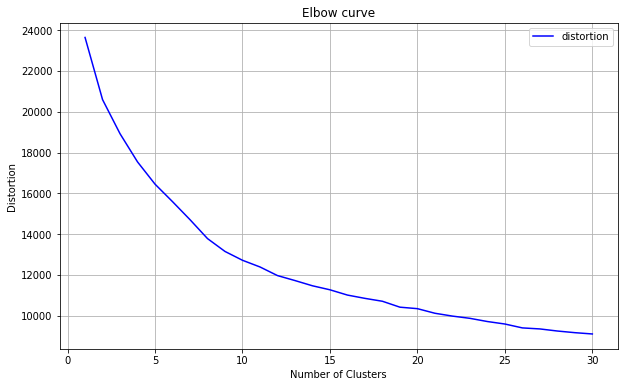

In [10]:
clusterCols = ['acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'instrumentalness_scaled',
               'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'time_signature_scaled',
               'valence_scaled', 'artist_popularity_scaled'] #variables to cluster

distortion = list()
for k in range(1, 31): #started with range [1, 51] and narrowed down to this range 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train_new.loc[:, clusterCols])
    distortion.append(kmeans.inertia_) #append distortion value to list

#plot elbow curves 
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), distortion, c = 'b', label = 'distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.legend()
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [11]:
#initiate clusters
def makeCluster(df, n, rs, cols):
    '''
    Parameters:
    1) df: master data frame
    2) n: number of clusters
    3) rs: random state
    4) cols: list of clustering variables
    '''
    #copy dataframe
    dfCluster = df.copy()

    #fit clusters
    kmeans = KMeans(n_clusters = n, random_state = rs)
    kmeans.fit(dfCluster.loc[:, cols])

    #get location of cluster centroids and label
    center = kmeans.cluster_centers_
    label = kmeans.labels_
    dfCluster['cluster_label'] = label
    dfCluster['cluster_label'] = dfCluster['cluster_label'] + 1 #increment by 1 so 0 implies non-existence in prediction
    
    #append centroids to data frame
    centroids = defaultdict(list)
    for col in cols:
        centroids['columns'].append(col)
    for a in range(len(center)):
        for b in range(len(center[0])):
            centroids['c'+ str(a)].append(center[a][b])
            dfCluster['c'+ str(a) + cols[b]] = center[a][b]

#     #compute distance to centroids
#     distances = defaultdict(list)
#     for c in range(len(center)):
#         for d in range(len(cols)):
#             distances['c'+str(c)+'distance'].append(abs(dfCluster[cols[d]]
#                                                         - dfCluster['c'+str(c)+cols[d]]))    
    
#     #append distance to centroids to data frame
#     for key in distances:
#         dfCluster[key] = sum(distances[key])

#     #rank centroids
#     centroids = defaultdict(list)
#     for e in range(len(center)):
#         centroids['c'+str(e)].append(dfCluster[dfCluster['c'+str(e)+'distance']
#                                                == dfCluster['c'+str(e)+'distance'].min()])

    return dfCluster, pd.DataFrame.from_dict(centroids)

In [12]:
train_cluster, train_centroids = makeCluster(train_new, 50, 48, clusterCols)

In [13]:
#rank centroids
def rankC(dfCentroid, n):
    rankC = defaultdict(list)
    for i in range(n):
        rankC['cluster'].append(i)
        for j in range(n):
            rankC[str(j)].append(euclidean(dfCentroid['c'+str(i)], dfCentroid['c'+str(j)]))    
    rankC = pd.DataFrame(rankC)
    orderRankC = defaultdict(list)
    for i in range(n):
        orderRankC[str(i)] = rankC[str(i)].sort_values(ascending = True).index.values
    return orderRankC

In [14]:
orderRankc = rankC(train_centroids, 50)

In [15]:
prediction_cluster = train_cluster[['Playlistid', 'Trackid', 'Track_uri', 'Artist_Name', 'Track_Name',
                                   'artist_genres','artist_popularity', 'cluster_label']]

In [16]:
mode_artist = prediction_cluster.groupby(['cluster_label', 'Artist_Name'])['Playlistid'].count().reset_index()
mode_artist = mode_artist.rename(columns = {'Playlistid': 'mode_artist'})
prediction_cluster = prediction_cluster.merge(mode_artist, on = ['cluster_label', 'Artist_Name'])

In [17]:
mode_track = prediction_cluster.groupby(['cluster_label', 'Track_Name'])['Playlistid'].count().reset_index()
mode_track = mode_track.rename(columns = {'Playlistid': 'mode_track'})
prediction_cluster = prediction_cluster.merge(mode_track, on = ['cluster_label', 'Track_Name'])

## Prediction

In [18]:
def nholdout(playlist_id, df):
    '''Pass in a playlist id to get number of songs held out in val/test set'''
    
    return len(df[df.Playlistid == playlist_id].Track_uri)

def cPredict(dfCluster, playlist_id, clusterRank, df):
    
    k = nholdout(playlist_id, df)*15 #number of predictions
    pred = list() #cache list for prediction

    playlist = dfCluster[dfCluster['Playlistid'] == playlist_id] #get playlist from cluster data frame
    tracks = playlist.Track_uri.values #list of existing tracks
    
    #get cluster label count from playlist
    clusterCNT = playlist.groupby('cluster_label').agg({
    'Playlistid': len
    }).reset_index().sort_values(by = 'Playlistid', ascending = False) 
    
    #cluster labels order by occurance in descending order
    labels = clusterCNT.cluster_label.values.tolist()
    
    #populate cluster labels based on computed euclidean distances 
    for label in labels:
        add = clusterRank[str(label)]
        for c in add:
            if c not in labels:
                labels.append(c)       
    
    #stage1 - predict based on cluster popularity
    for label in labels:      
        fit = dfCluster[dfCluster['cluster_label'] == label] #subset tracks with the same label
        rankTrack = fit.sort_values(by = ['mode_artist','mode_track'], ascending = [False,False]) #rank tracks in fit by artist and track
        pred_uri = rankTrack.Track_uri.values
        for uri in pred_uri:
            if uri not in tracks:
                pred.append(uri)
                if len(pred) == k:
                    break
            if len(pred) == k:
                break
        
        if len(pred) == k:
            break
    
    return pred

In [ ]:
# #example prediction
# predictions = cPredict(prediction_cluster, 2535, orderRankc, val)

## Performance

In [19]:
def r_precision(prediction, val_set):
# prediction should be a list of predictions
# val_set should be pandas Series of ground truths
    score = np.sum(val_set.isin(prediction))/val_set.shape[0]
    return score

### NDCG Code Source: https://gist.github.com/bwhite/3726239
def dcg_at_k(r, k, method=0):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [20]:
rps = []
ndcgs = []
for pid in val.Playlistid:
    ps = cPredict(prediction_cluster, pid, orderRankc, val) # predictions
    vs = val[val.Playlistid == pid].Track_uri # ground truth
    rps.append(r_precision(ps, vs))
    
    r = np.zeros(len(ps))
    for i, p in enumerate(ps):
        if np.any(vs.isin([p])):
            r[i] = 1
    ndcgs.append(ndcg_at_k(r, len(r)))

In [21]:
avg_rp = np.mean(rps)
avg_ndcg = np.mean(ndcgs)
print('Avg. R-Precision: ', avg_rp)
print('Avg. NDCG: ', avg_ndcg)
print('Total Sum: ', np.mean([avg_rp, avg_ndcg]))

Avg. R-Precision:  0.036511156186612576
Avg. NDCG:  0.058036758092802634
Total Sum:  0.047273957139707605
